In [70]:
import subprocess
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [71]:
numthreads=[[1],[2],[4],[8]]
times=np.zeros((np.size(numthreads),1))
pi=np.zeros((np.size(numthreads),1))
for j in range(np.size(numthreads)):
    p = subprocess.Popen(['/home/aspa/Documents/test/a.out'], stdout=subprocess.PIPE, stdin=subprocess.PIPE)

    value=str(numthreads[j][0]) +'\n'+str(numthreads[j][0]) + '\n'
    value=bytes(value, 'UTF-8')  # Needed in Python 3.
  
    result, _ = p.communicate(input=value)
    
    # Decode and process the result
    result =result.decode("utf-8").strip().split('\n')
    print(result)

    matches = re.findall(r'[\d+\.\d+]+', result[0])
    pi[j]=float(matches[1])

    matches = re.findall(r'[\d.]+', result[1])
    times[j]=float(matches[0])
            

['With 1 threads pi is estimated as 3.14189', 'Execution Time: 6029']
['With 2 threads pi is estimated as 3.14117', 'Execution Time: 3050']
['With 4 threads pi is estimated as 3.14157', 'Execution Time: 2268']
['With 8 threads pi is estimated as 3.14183', 'Execution Time: 2257']


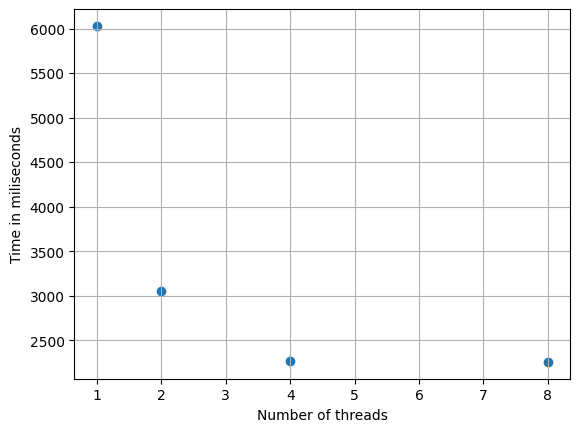

In [72]:
f=plt.plot()
plt.scatter(numthreads,times)
plt.xlabel('Number of threads')
plt.ylabel('Time in miliseconds')
plt.grid()


In [75]:
def Amdahl(s,p):
    y=1/((1-p)+p/s)
    return y

In [76]:
from scipy.optimize import curve_fit

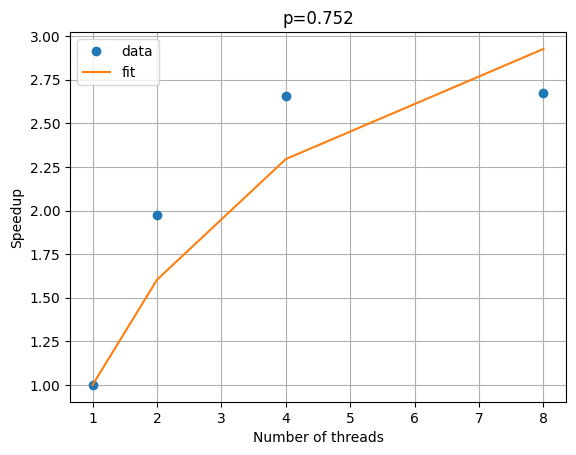

In [83]:
f2=plt.plot()
numthreads=[1,2,4,8]
speedup=np.array([times[0]/times[0],times[0]/times[1],times[0]/times[2],times[0]/times[3]])
speedup=np.ndarray.flatten(speedup)
xdata = np.asarray(numthreads)
ydata = np.asarray(speedup)

parameters, covariance = curve_fit(Amdahl, xdata, ydata)
fit_y = Amdahl(xdata, parameters[0])
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')

plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.grid()
plt.legend()
plt.title(f'p={parameters[0]:2.3f}')
plt.show()
